The following is a binary classification problem, it involves customers will soon stop doing business with SyriaTel, a telecommunication company. 
the data mostly will resonate with SyriaTel, since there is money loss from customer withdraw. Make predictions of any patterns. use the dataset provided 


In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib



In [133]:
df1 = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [134]:
df1.shape

(3333, 21)

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [136]:
#our dataset contains 3333 rows and 21 columns
df1.groupby('churn')['churn'].agg('count')


churn
False    2850
True      483
Name: churn, dtype: int64

In [137]:
#checking for any missing values.
df1.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [138]:
# from the result above,our dataset contains no missing values.



In [139]:
df1.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [140]:
df1.describe(include=["object","bool"])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


In [141]:
df1 ['total day charge'].unique()

array([45.07, 27.47, 41.38, ..., 54.59, 39.29, 30.74])

In [142]:
df1.sort_values(by="total day charge", ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True


In [143]:
df1.sort_values(by=["churn","total day charge"], ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,False
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,False
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,False


In [144]:
#calculating the mean for the target variable
df1["churn"].mean()

0.14491449144914492

In [145]:
df1.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes          395.0
total night calls              175
total night charge           17.77
total intl minutes            20.0
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                         True
dtype: object

In [146]:
columns_to_show = ["total day minutes","total eve minutes","total night minutes"]
df1.groupby(["churn"])[columns_to_show].describe(percentiles=[])

total day minutes                                            \
                  count        mean        std  min    50%    max   
churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      total eve minutes                                             \
                  count        mean        std   min    50%    max   
churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      total night minutes                                              
                    count        mean        std   min     50%    max  
churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

In [147]:
df1["total minutes"] =( df1["total day minutes"]+df1["total eve minutes"] +df1["total night minutes"] +df1["total intl minutes"])
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0


In [148]:
#add a column of the total charge
df1["total charge"] = (df1["total day charge"] +df1["total eve charge"] + df1["total night charge"] +df1["total intl charge"])
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09


In [149]:
#convert the target variable to integer
df1['churn'] = df1['churn'].astype(int)

In [150]:
# Encode categorical variables
df1['international plan'] = df1['international plan'].map({'yes': 1, 'no': 0})
df1['voice mail plan'] = df1['voice mail plan'].map({'yes': 1, 'no': 0})

In [151]:
#dropping the less informative columns
df1.drop(columns=['state', 'area code', 'phone number'], inplace=True)


In [152]:
#calculating the correlation between numerical features and churn
correlations = df1.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
international plan        0.259852
total charge              0.231549
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total minutes             0.198607
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


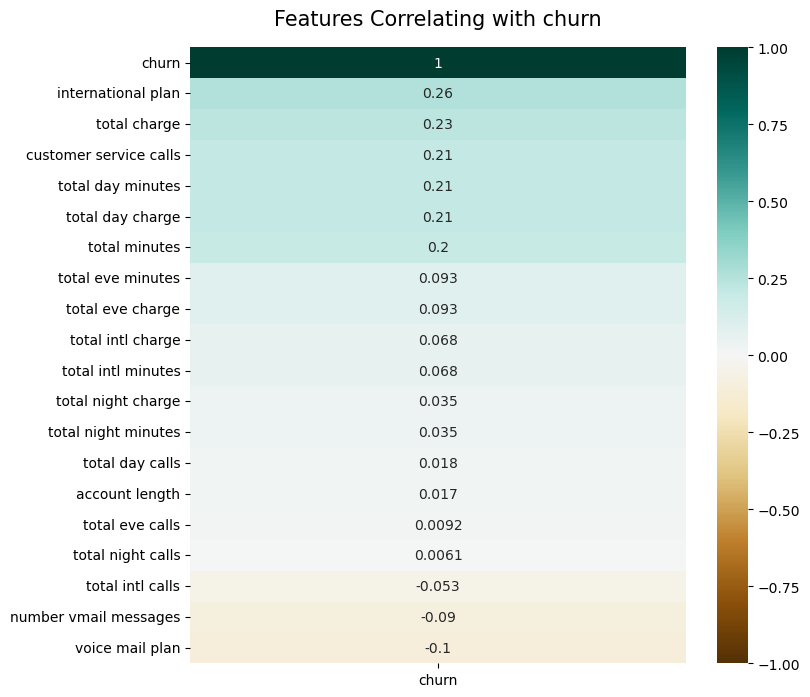

In [153]:
import seaborn as sns
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df1.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with churn', fontdict={'fontsize':15}, pad=16);


Text(0.5, 1.0, 'Effect of customer service calls on Churn Rate')

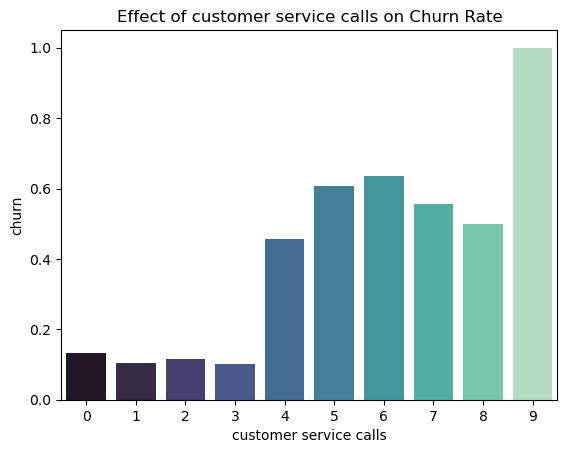

In [154]:
import seaborn as sns
sns.barplot(x='customer service calls', y='churn',
                    data=df1, palette='mako', errorbar=None).set_title('Effect of customer service calls on Churn Rate')

Text(0.5, 1.0, 'Effect of International Plan on Churn Rate')

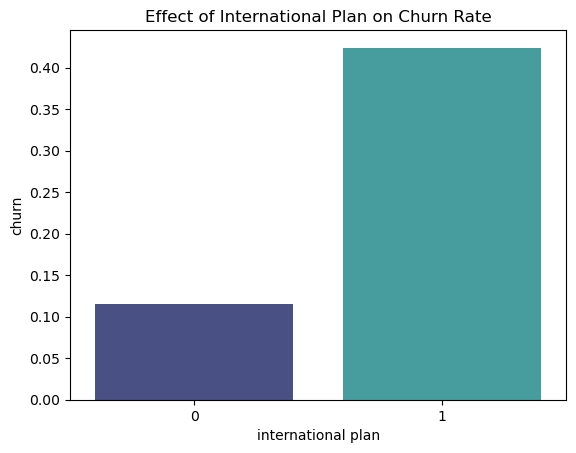

In [155]:
import seaborn as sns
sns.barplot(x='international plan', y='churn',
                    data=df1, palette='mako', errorbar=None).set_title('Effect of International Plan on Churn Rate')

In [156]:
#The churn rate is significantly higher for customers with an international plan compared to those without one.

<Axes: xlabel='churn', ylabel='total charge'>

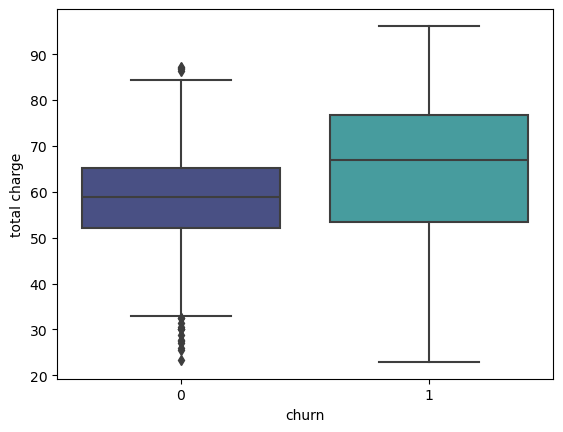

In [157]:
sns.boxplot(x='churn', y='total charge',
              data=df1, palette='mako')

In [158]:
#Overall, the graph shows that customers who churned generally have higher total charges compared to those who did not churn.

In [159]:
# defining the appropriate x and y
X =df1.drop(columns=['churn'])
y = df1['churn']

In [160]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELLING
fit a logistic regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Accuracy: 0.856071964017991


Fit a Decision Tree model as comparison

In [163]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = model.predict(X_test_scaled)

model.score(X_test_scaled, y_pred_tree)



# Evaluate the model
print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       566
           1       0.81      0.89      0.85       101

    accuracy                           0.95       667
   macro avg       0.90      0.93      0.91       667
weighted avg       0.95      0.95      0.95       667

Accuracy: 0.952023988005997


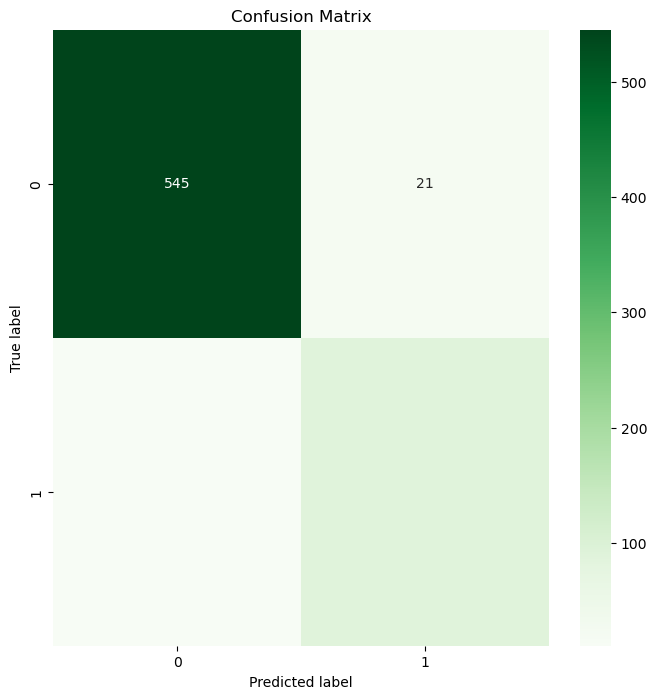

In [164]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

 Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 3%

In [165]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667

Accuracy: 0.9805097451274363


Fit a AdaBoost model, " compared to "Decision Tree model.

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score


# Initialize and train the AdaBoost model
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test_scaled)

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("AdaBoost Confusion Matrix:")
print(cm_ada)

AdaBoost Confusion Matrix:
[[553  13]
 [ 44  57]]


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       566
           1       0.81      0.56      0.67       101

    accuracy                           0.91       667
   macro avg       0.87      0.77      0.81       667
weighted avg       0.91      0.91      0.91       667

AdaBoost Accuracy: 0.9145427286356822


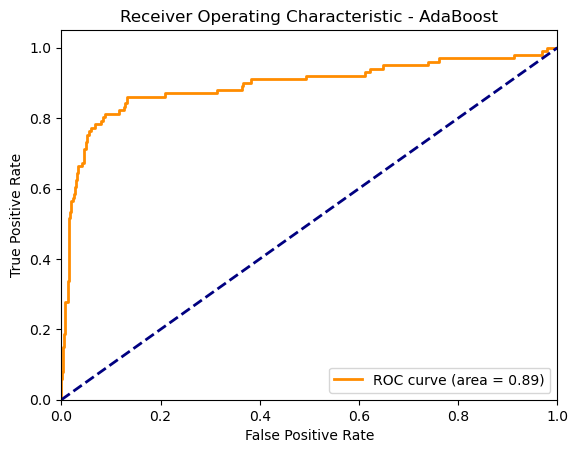

In [167]:
# Classification Report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada.predict_proba(X_test_scaled)[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure()
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()